In [1]:
%pip install numpy pandas matplotlib seaborn ipython jupyterlab tensorflow scikit-learn fastdtw tslearn


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\Alejo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np

o_player_sequences, _ = np.load("trajectories.npy",allow_pickle=True)

In [3]:
import tensorflow as tf


o_player_dense= []
for seq in o_player_sequences:
    new_seq = [np.array([x[0],x[1]]) for x in seq]
    o_player_dense.append(np.array(new_seq))
o_player_dense = np.array(o_player_dense,dtype=object)

padding_value = [0,0]
padded_o_seq = tf.keras.preprocessing.sequence.pad_sequences(o_player_dense,padding='post', value=padding_value, dtype='float32',maxlen = 90)


In [4]:
print(o_player_dense.shape)

(43856,)


In [5]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

K = 8
o_player_dense_transformed = to_time_series_dataset(padded_o_seq)
model = TimeSeriesKMeans(n_clusters=K, verbose=False, random_state=0,n_jobs=-1,init='random',metric="dtw")
model.fit(o_player_dense_transformed)


TimeSeriesKMeans(init='random', metric='dtw', n_clusters=8, n_jobs=-1,
                 random_state=0, verbose=False)

In [6]:
from tslearn.utils import to_time_series

cluster_centers = model.cluster_centers_
cluster_centers = to_time_series(cluster_centers)
cluster_centers.shape

(8, 90, 2)

In [7]:
#from sklearn.metrics.pairwise import euclidean_distances


distances = model.transform(o_player_dense_transformed)
cluster_labels = model.predict(o_player_dense_transformed)

print(distances[0])
print(cluster_labels[0])
sequences_ordered = [[] for i in range(K)]
for i in range(len(distances)):
    closest_center = cluster_labels[i]
    distance = distances[i][closest_center]
    sequences_ordered[closest_center].append((distance,i))



for i in range(len(sequences_ordered)):
    lst = sequences_ordered[i]
    lst = sorted(lst)
    sequences_ordered[i] = lst




[12.93378158 37.74808092 29.47542461 60.61923334 23.19364744 19.38593772
 55.74483329 41.19579401]
0


In [9]:
print(len(sequences_ordered[0]))
print(len(sequences_ordered[1]))


1078
2728


In [10]:
#np.save("sequences_ordered.npy", sequences_ordered)


In [14]:
print(len(o_player_dense_transformed))
print(len(o_player_sequences))

13276
13276


In [10]:
sequences_ordered = np.save('../Notebooks/sequences_ordered_full.npy',sequences_ordered,allow_pickle=True)


C:\Users\Alejo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Drawing out top 3 examples for cluster center 0
(4.3879964845563855, 32513)
[[0.0, 0.0, 0.0, 0.0, 0.0, 84.91, 5.820000000000007, -0.08999999999999986, 59.05, 8.77, 59.02], [0.010000000000005116, -0.009999999999999787, 0.02, 0.28, 0.0, 84.33, 5.820000000000007, -0.08999999999999986, 59.05, 8.77, 59.02], [0.010000000000005116, -0.009999999999999787, 0.06, 0.47, 0.0, 84.33, 5.820000000000007, -0.08999999999999986, 59.05, 8.77, 59.02], [0.060000000000002274, -0.019999999999999574, 0.45, 2.5, 0.05, 85.32, 5.820000000000007, -0.08999999999999986, 59.05, 8.77, 59.02], [0.12000000000000455, -0.02999999999999936, 0.83, 3.3, 0.07, 86.87, 5.820000000000007, -0.08999999999999986, 59.05, 8.77, 59.02], [0.240000000000002, -0.05999999999999872, 1.3, 3.82, 0.12, 89.46, 5.820000000000007, -0.08999999999999986, 59.05, 8.77, 59.02], [0.4100000000000037, -0.09999999999999964, 1.91, 4.52, 0.18, 94.55, 5.820000000000007, -0.08999999999999986, 59.05, 8.77, 59.02], [0.6400000000000006, -0.15000000000000036, 2

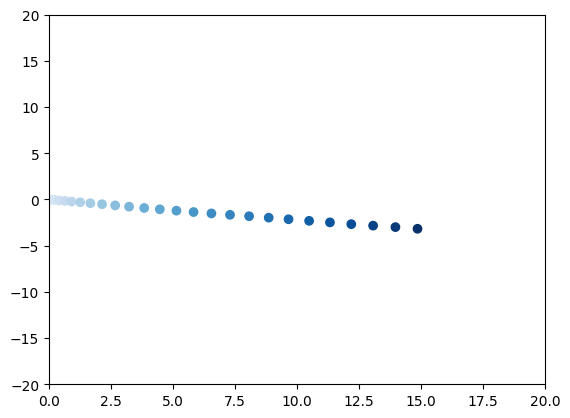

(4.424394031294903, 26035)


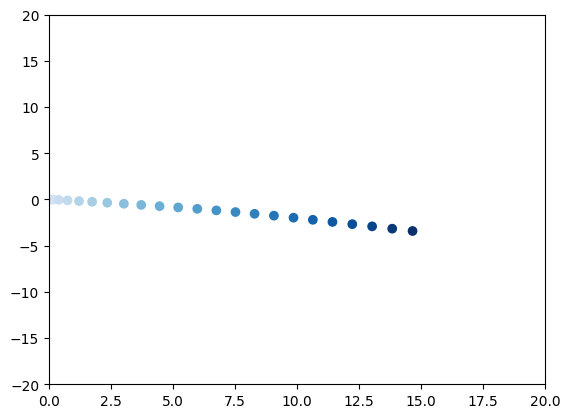

(4.449356553306629, 33787)


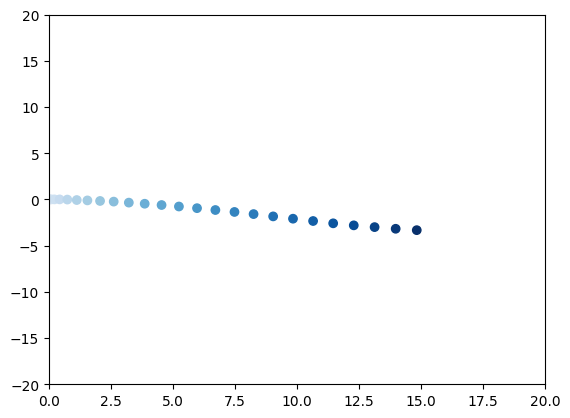

Drawing out top 3 examples for cluster center 1
(3.69832226757131, 34111)
[[0.0, 0.0, 0.19, 0.97, 0.01, 102.23, 4.169999999999998, -0.4399999999999977, 19.26, 20.089999999999996, 18.27], [0.0799999999999983, 0.020000000000003126, 0.71, 3.1, 0.09, 103.85, 4.169999999999998, -0.4399999999999977, 19.26, 20.089999999999996, 18.27], [0.21999999999999886, 0.07000000000000028, 1.38, 4.29, 0.14, 100.52, 4.169999999999998, -0.4399999999999977, 19.26, 20.089999999999996, 18.27], [0.379999999999999, 0.11999999999999744, 1.87, 4.24, 0.17, 97.95, 4.169999999999998, -0.4399999999999977, 19.26, 20.089999999999996, 18.27], [0.6099999999999994, 0.18999999999999773, 2.44, 4.56, 0.24, 101.55, 4.169999999999998, -0.4399999999999977, 19.26, 20.089999999999996, 18.27], [0.889999999999997, 0.2700000000000031, 3.14, 5.34, 0.3, 101.55, 4.169999999999998, -0.4399999999999977, 19.26, 20.089999999999996, 18.27], [1.25, 0.36999999999999744, 3.94, 6.31, 0.37, 102.7, 4.169999999999998, -0.4399999999999977, 19.26, 20

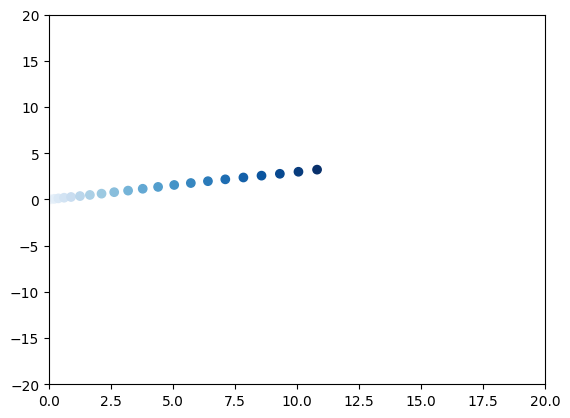

(3.7068588114666645, 6425)


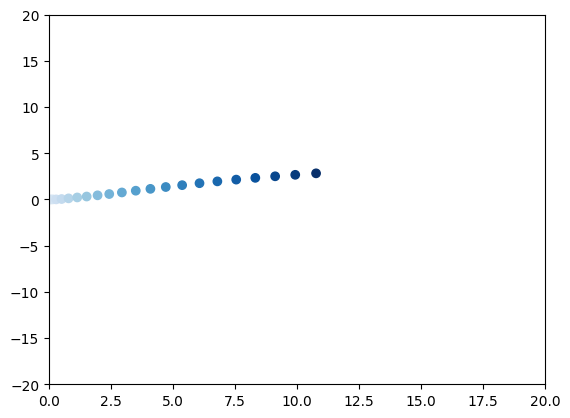

(3.8113312450094896, 43400)


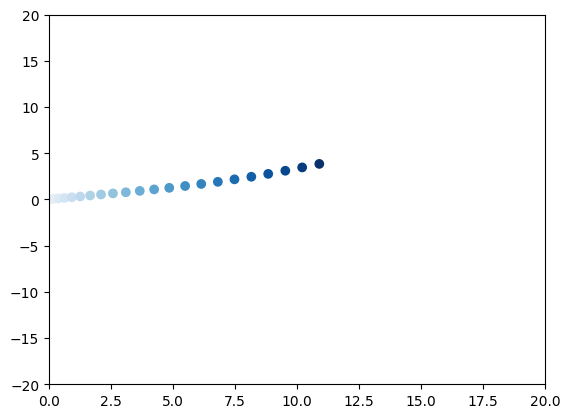

Drawing out top 3 examples for cluster center 2
(10.794660098725506, 31024)
[[0.0, 0.0, 0.09, 0.82, 0.01, 95.77, 6.040000000000006, 0.6999999999999993, 63.64, 11.97, 64.93], [0.03999999999999915, -0.02000000000000135, 0.49, 2.57, 0.05, 95.77, 6.040000000000006, 0.6999999999999993, 63.64, 11.97, 64.93], [0.11999999999999744, -0.030000000000001137, 0.87, 3.28, 0.08, 96.71, 6.040000000000006, 0.6999999999999993, 63.64, 11.97, 64.93], [0.21999999999999886, -0.07000000000000028, 1.26, 3.53, 0.11, 97.33, 6.040000000000006, 0.6999999999999993, 63.64, 11.97, 64.93], [0.39000000000000057, -0.10000000000000142, 1.79, 3.96, 0.18, 94.67, 6.040000000000006, 0.6999999999999993, 63.64, 11.97, 64.93], [0.6400000000000006, -0.15000000000000036, 2.5, 4.7, 0.25, 85.29, 6.040000000000006, 0.6999999999999993, 63.64, 11.97, 64.93], [0.9299999999999926, -0.21000000000000085, 3.09, 4.95, 0.29, 76.99, 6.040000000000006, 0.6999999999999993, 63.64, 11.97, 64.93], [1.269999999999996, -0.2900000000000009, 3.71, 4.

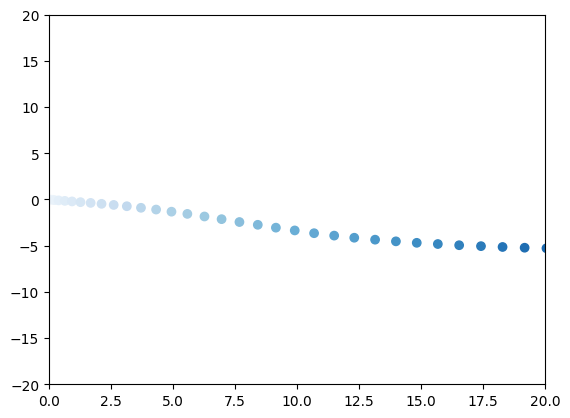

(10.811526360878565, 7526)


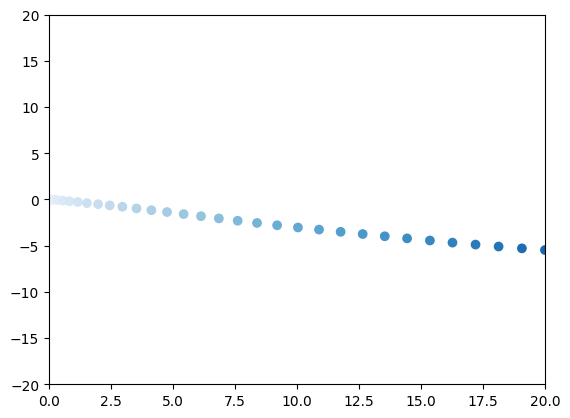

(10.88662346932361, 16067)


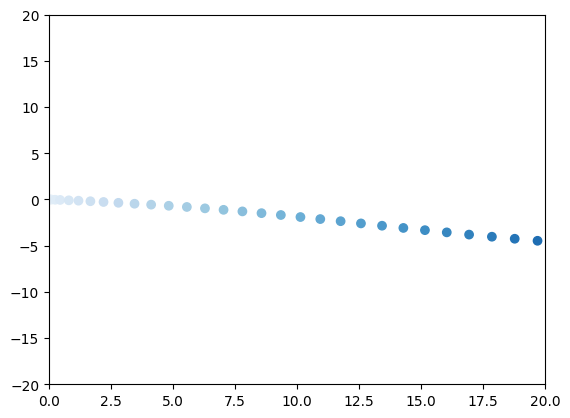

Drawing out top 3 examples for cluster center 3
(7.9127880273277, 300)
[[0.0, 0.0, 0.61, 2.5, 0.06, 260.14, 1.8700000000000045, -0.30999999999999517, 71.66999999999999, 14.959999999999994, 72.6], [0.0799999999999983, 0.060000000000002274, 1.08, 3.19, 0.1, 260.14, 1.8700000000000045, -0.30999999999999517, 71.66999999999999, 14.959999999999994, 72.6], [0.21000000000000796, 0.1600000000000037, 1.65, 3.87, 0.17, 263.95, 1.8700000000000045, -0.30999999999999517, 71.66999999999999, 14.959999999999994, 72.6], [0.37999999999999545, 0.28000000000000114, 2.13, 3.83, 0.2, 263.12, 1.8700000000000045, -0.30999999999999517, 71.66999999999999, 14.959999999999994, 72.6], [0.5999999999999943, 0.45000000000000284, 2.73, 4.02, 0.27, 256.54, 1.8700000000000045, -0.30999999999999517, 71.66999999999999, 14.959999999999994, 72.6], [0.8400000000000034, 0.6400000000000006, 3.21, 3.76, 0.31, 254.35, 1.8700000000000045, -0.30999999999999517, 71.66999999999999, 14.959999999999994, 72.6], [1.1200000000000045, 0.87

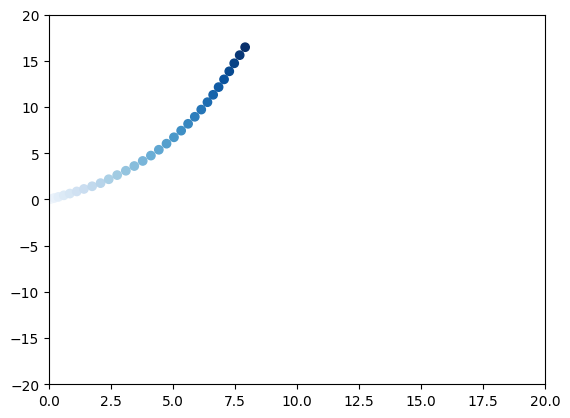

(7.96856100620885, 19876)


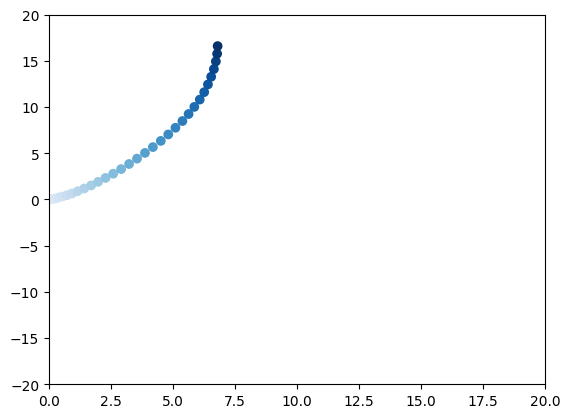

(8.003733254050669, 692)


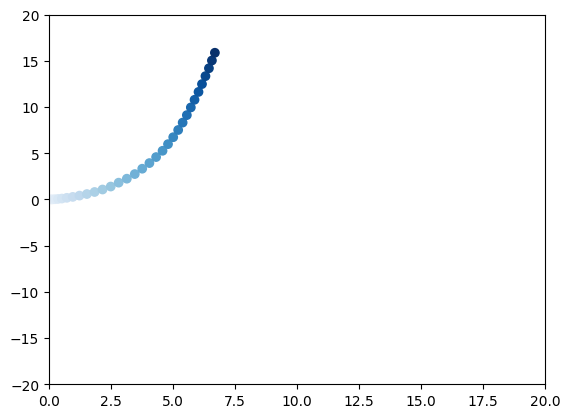

Drawing out top 3 examples for cluster center 4
(3.248433382434135, 15765)
[[0.0, 0.0, 0.0, 0.0, 0.01, 77.84, 4.909999999999997, 2.1799999999999997, 68.58, 13.69, 70.41], [0.010000000000005116, -0.009999999999999787, 0.0, 0.01, 0.02, 77.84, 4.909999999999997, 2.1799999999999997, 68.58, 13.69, 70.41], [0.04000000000000625, -0.019999999999999574, 0.01, 0.01, 0.03, 79.37, 4.909999999999997, 2.1799999999999997, 68.58, 13.69, 70.41], [0.0799999999999983, -0.049999999999998934, 0.01, 0.01, 0.04, 79.37, 4.909999999999997, 2.1799999999999997, 68.58, 13.69, 70.41], [0.12999999999999545, -0.08000000000000007, 0.02, 0.02, 0.07, 81.45, 4.909999999999997, 2.1799999999999997, 68.58, 13.69, 70.41], [0.18000000000000682, -0.09999999999999964, 0.17, 3.16, 0.05, 81.45, 4.909999999999997, 2.1799999999999997, 68.58, 13.69, 70.41], [0.25, -0.15000000000000036, 0.95, 8.16, 0.08, 85.47, 4.909999999999997, 2.1799999999999997, 68.58, 13.69, 70.41], [0.39000000000000057, -0.2400000000000002, 2.2, 11.0, 0.17, 80

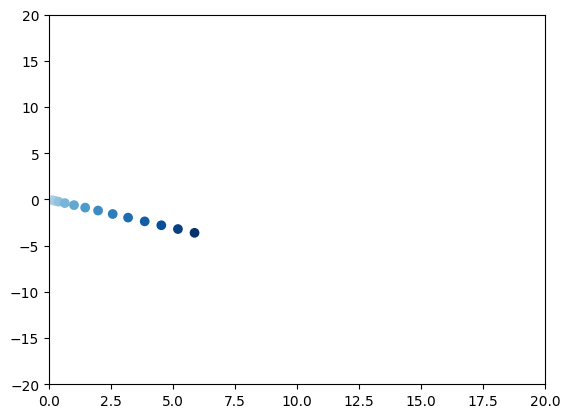

(3.40762438020788, 17735)


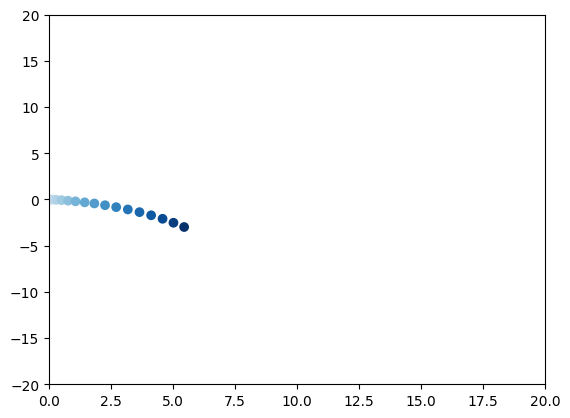

(3.424741258556939, 35443)


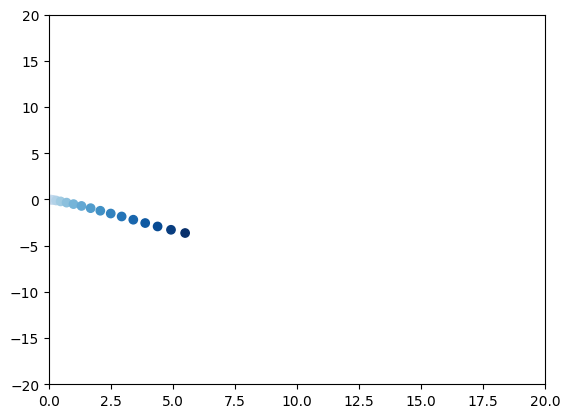

Drawing out top 3 examples for cluster center 5
(6.974775098893703, 390)
[[0.0, 0.0, 0.0, 0.0, 0.0, 270.82, 4.400000000000006, -3.0600000000000005, 79.88000000000001, 15.75, 81.01], [0.0, 0.0, 0.02, 0.44, 0.01, 270.82, 4.400000000000006, -3.0600000000000005, 79.88000000000001, 15.75, 81.01], [0.01999999999999602, 0.0, 0.2, 1.95, 0.01, 270.82, 4.400000000000006, -3.0600000000000005, 79.88000000000001, 15.75, 81.01], [0.060000000000002274, -0.019999999999999574, 0.55, 2.95, 0.04, 269.35, 4.400000000000006, -3.0600000000000005, 79.88000000000001, 15.75, 81.01], [0.12999999999999545, -0.05000000000000071, 0.99, 3.82, 0.08, 270.68, 4.400000000000006, -3.0600000000000005, 79.88000000000001, 15.75, 81.01], [0.269999999999996, -0.10999999999999943, 1.57, 4.43, 0.14, 273.01, 4.400000000000006, -3.0600000000000005, 79.88000000000001, 15.75, 81.01], [0.45999999999999375, -0.21000000000000085, 2.25, 4.88, 0.22, 275.54, 4.400000000000006, -3.0600000000000005, 79.88000000000001, 15.75, 81.01], [0.70

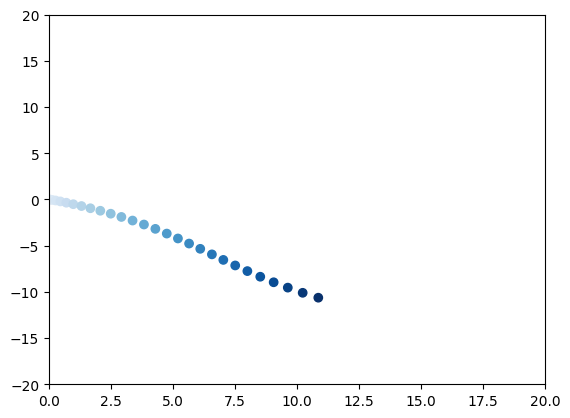

(7.017528911506576, 10339)


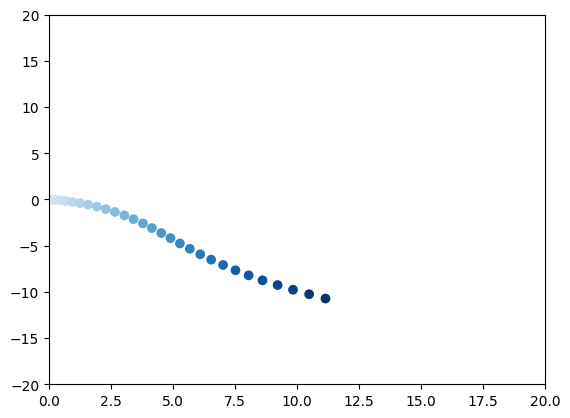

(7.081817414067852, 28927)


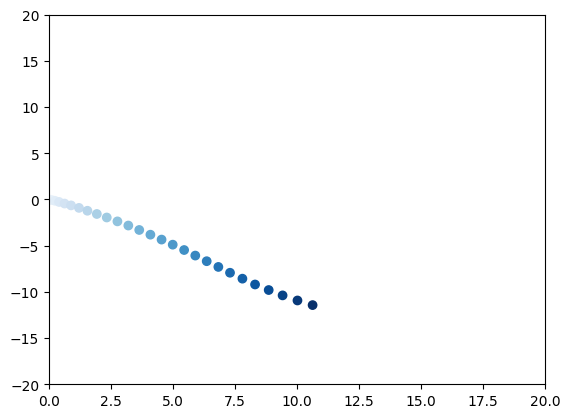

Drawing out top 3 examples for cluster center 6
(8.696881354902846, 11071)
[[0.0, 0.0, 0.07, 0.89, 0.0, 265.22, 2.0899999999999963, 0.03999999999999915, 37.059999999999995, 21.16, 38.12], [0.020000000000003126, 0.0, 0.26, 1.71, 0.02, 265.81, 2.0899999999999963, 0.03999999999999915, 37.059999999999995, 21.16, 38.12], [0.07000000000000028, 0.010000000000001563, 0.64, 2.76, 0.06, 268.53, 2.0899999999999963, 0.03999999999999915, 37.059999999999995, 21.16, 38.12], [0.1700000000000017, 0.05000000000000071, 1.1, 3.52, 0.1, 265.61, 2.0899999999999963, 0.03999999999999915, 37.059999999999995, 21.16, 38.12], [0.3100000000000023, 0.10999999999999943, 1.62, 4.14, 0.15, 266.99, 2.0899999999999963, 0.03999999999999915, 37.059999999999995, 21.16, 38.12], [0.509999999999998, 0.19000000000000128, 2.21, 4.44, 0.22, 267.75, 2.0899999999999963, 0.03999999999999915, 37.059999999999995, 21.16, 38.12], [0.7700000000000031, 0.3200000000000003, 2.94, 4.96, 0.29, 273.07, 2.0899999999999963, 0.03999999999999915,

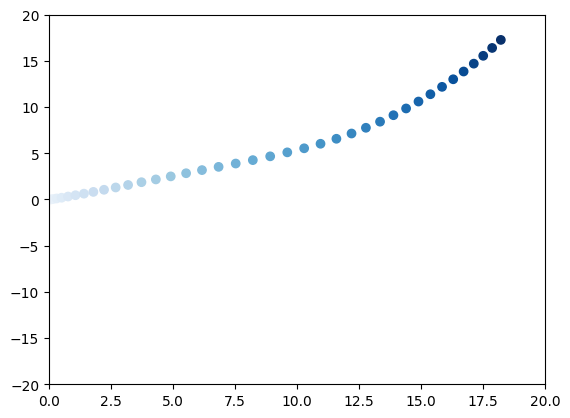

(9.166485516255934, 40799)


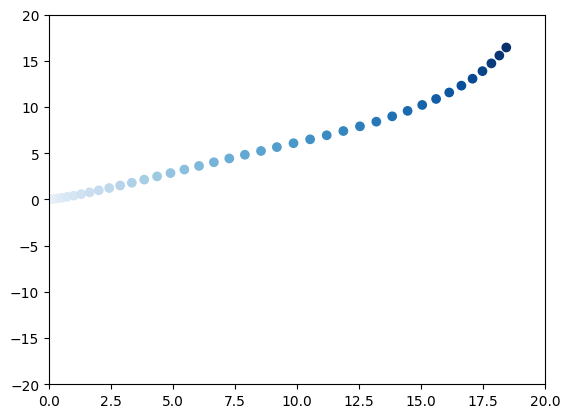

(9.31905329316325, 2641)


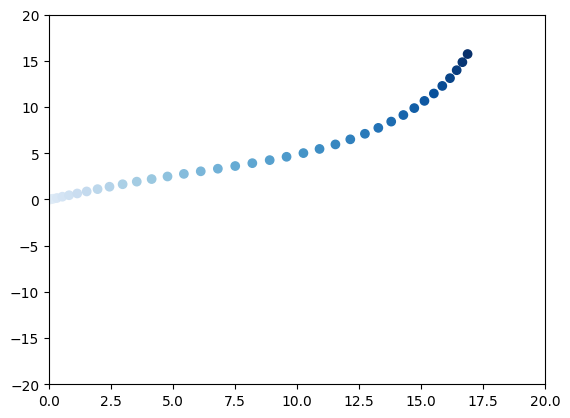

Drawing out top 3 examples for cluster center 7
(9.398704215875311, 29485)
[[0.0, 0.0, 0.01, 0.5, 0.02, 278.83, 2.539999999999999, -0.3899999999999988, 48.17000000000001, 11.29, 49.09], [0.00999999999999801, 0.010000000000001563, 0.18, 1.98, 0.01, 278.83, 2.539999999999999, -0.3899999999999988, 48.17000000000001, 11.29, 49.09], [0.04999999999999716, 0.010000000000001563, 0.54, 3.27, 0.04, 278.83, 2.539999999999999, -0.3899999999999988, 48.17000000000001, 11.29, 49.09], [0.14000000000000057, 0.030000000000001137, 1.06, 4.25, 0.09, 278.83, 2.539999999999999, -0.3899999999999988, 48.17000000000001, 11.29, 49.09], [0.29999999999999716, 0.0600000000000005, 1.74, 5.08, 0.16, 281.32, 2.539999999999999, -0.3899999999999988, 48.17000000000001, 11.29, 49.09], [0.5300000000000011, 0.10000000000000142, 2.45, 5.61, 0.23, 278.02, 2.539999999999999, -0.3899999999999988, 48.17000000000001, 11.29, 49.09], [0.8200000000000003, 0.15000000000000036, 3.16, 5.69, 0.3, 275.6, 2.539999999999999, -0.3899999999

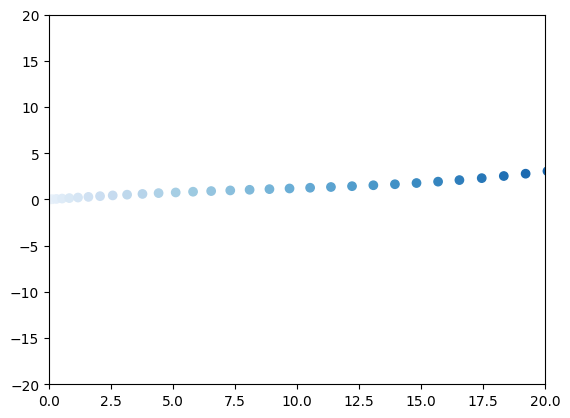

(9.410762286011588, 21655)


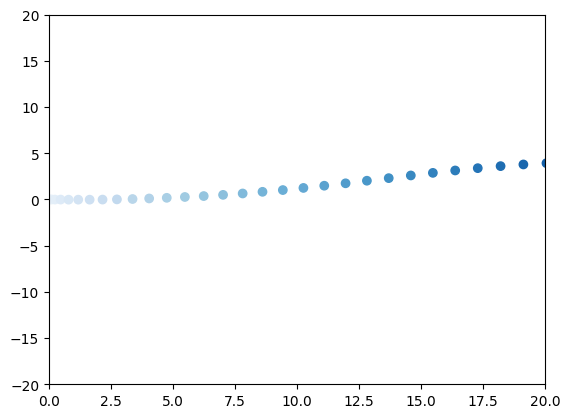

(9.532516887226782, 24911)


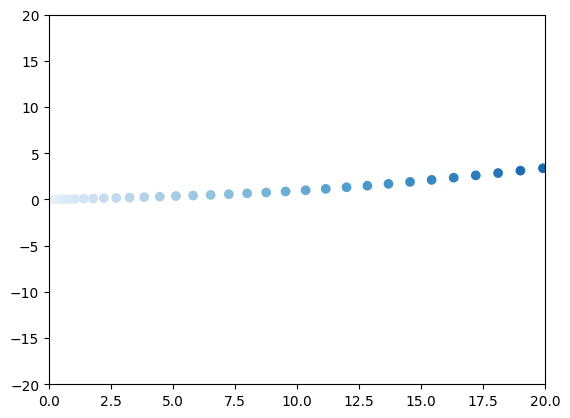

In [8]:
import matplotlib.pyplot as plt
for i in range(len(sequences_ordered)):
    print(f"Drawing out top 3 examples for cluster center {i}")
    cluster = sequences_ordered[i]
    for i in range(3):
        tup = cluster[i]
        print(tup)
        current_index = tup[1]
        seq = o_player_sequences[current_index]
        if i == 0:
            print(seq)
        x = [x[0] for x in seq]
        y = [x[1] for x in seq]
        c = np.linspace(0, 1, len(x))

        plt.scatter(x,y, c = c,cmap='Blues')
        plt.ylim(-20, 20)
        plt.xlim(0, 20)
        plt.show()